# Entropy

- A measure of a data set's disorder or uncertainty (how same or different it is). It is a metric that quantifies the amount of information in a dataset.

- If we classify a data set into N different classes (example: a data set of animal attributes and their species)

    - The entropy is 0 if all of the classes in the data are the same

    - The entropy is high if they're all different

$H(S) = -p_1\ln p_1- ... -p_n\ln p_n$, for $p_i$ represents the proportion of the data labeled for each class.

<img src="https://lh5.googleusercontent.com/rzckAFQEu6FKxefgM8OhISlI92uWBr5iVX3nqaHMDnJYmVUXvbbbJ16sSuGG9FVdPoleNpiGbkTB46xeG2kVLMe0ufEdybi1poOZCwnzIQ8ozFQ99ZWcyd9Tf6ivmw8S7I83GOsg" alt="Drawing" style="width: 500px;"/>


# Decision Tree

Supervised Learning

"Decision Tree models where the target variable can take a **discrete** set of values are called **classification** trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take **continuous** values (typically real numbers) are called **regression** trees."

- Decision tree is as a hierarchical if-else statement based on feature comparison operators. 

- It is used for regression and classification problems, finding relationships between predictor and response variables.

- "To build the tree, the algorithm selects features and thresholds by optimizing a loss function, aiming for the most accurate predictions."

<img src="https://lh3.googleusercontent.com/_6NqienwUG789kx1VMQRdx24TNtjYhJyJILKIE6Qs7FVOc-HH70kHkCZ7ikqKMSrlymRZ31wsEQ82BvUavyLRfk-IQJsaNSxu3bTgdckjNqJLz2Cqp6tMnr4x2CdCsFeDZhv6Lsa" alt="Drawing" style="width: 500px;"/>


## How Decision Tree Works

At each step, find the attribute we can use to partition the data set to **minimize** the **entropy** of the data at the next step

    - ID3 Algorithm

*greedy algorithm*: it just picks the decision that reduce the entropy the most at that stage

# Random Forest

- Decision trees are easily susceptible to overtting

To fight this, we can construct several alternate decision trees and let them 'vote' on the final classification:

    - Bootstrap aggregating or bagging: randomly re-sample the input data for each tree

    - Randomize a subset of the attributes each step is allowed to choose from

A forest of Decision Trees where they are drawing from different samples and also different set of attributes at each stage that it can choose between.

# Hiring Prediction - Decision Trees

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

In [3]:
df = pd.read_csv('.\MLCourse\PastHires.csv')
df.shape

(13, 7)

In [4]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


Sklearn needs everything to be numerical

In [5]:
d = {'Y':1, 'N':0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)

d = {'BS':0, 'MS':1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)

In [7]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


In [8]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Construct the Decision Tree

In [24]:
y = df['Hired']
x = df[features]

hiring_tree = tree.DecisionTreeClassifier()
hiring_tree.fit(x,y)

DecisionTreeClassifier()

[Text(0.7142857142857143, 0.9, 'Employed? <= 0.5\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.5714285714285714, 0.7, 'Interned <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.42857142857142855, 0.5, 'Years Experience <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2857142857142857, 0.3, 'Top-tier school <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

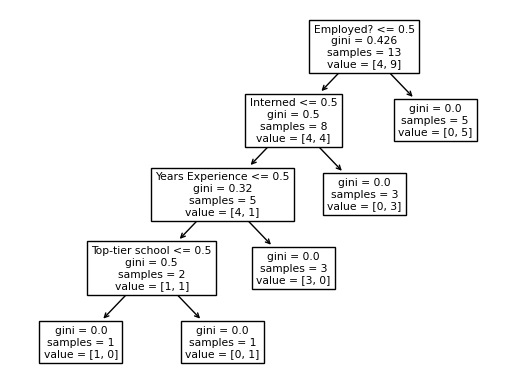

In [25]:
tree.plot_tree(hiring_tree, feature_names=features)

Reading the tree:

**Left True and right is False**

value = [3, 0] means 3 no-hires and 0 hires by the time we get to that point

Gini is a measure of entropy

# Random Forest for Hiring

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
# random forest of 10 trees
hiring_forest = RandomForestClassifier(n_estimators=10)
hiring_forest.fit(x,y)

RandomForestClassifier(n_estimators=10)

In [36]:
x.iloc[0,:]

Years Experience      10
Employed?              1
Previous employers     4
Level of Education     0
Top-tier school        0
Interned               0
Name: 0, dtype: int64

In [38]:
# predict employment of an employed 10-year veteran
hiring_forest.predict(np.array([10,1,4,0,0,0]).reshape(1, -1))

C:\Users\ville\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)